# Import the Required Libraries

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from jupyter_dash import JupyterDash
import dash_html_components as html 
import dash_core_components as dcc
from dash.dependencies import Input, Output
import arabic_reshaper
from bidi.algorithm import get_display
import warnings
warnings.filterwarnings('ignore')

/var/folders/08/58mz7f7n2ps7fm984_8_7slc0000gn/T/ipykernel_7066/1217464728.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/var/folders/08/58mz7f7n2ps7fm984_8_7slc0000gn/T/ipykernel_7066/1217464728.py:9: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


# Data reading

### Data reading

In [2]:
Data = pd.read_csv('RiyadhVillasAqar.csv')

print('Shape of DataFrame:', Data.shape)
print('Size of DataFrame:', Data.size)


Shape of DataFrame: (46826, 26)
Size of DataFrame: 1217476


### checking first five rows

In [3]:
Data.head()

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4.0,5+,20.0,1.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3.0,5+,20.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0.0,0.0,0.0,المهدية,غرب الرياض,3000000.0,5555.555556
2,2,جنوبية شرقية,7,2.0,5+,15.0,1.0,31.0,1.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,3,غربية,7,3.0,5+,15.0,1.0,3.0,0.0,1.0,...,0,1.0,0.0,1.0,0.0,0.0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,4,شمالية,4,2.0,4,25.0,1.0,0.0,1.0,1.0,...,3.0,1.0,1.0,1.0,0.0,0.0,قرطبة,شرق الرياض,3500000.0,8750.000000


### checking last five rows

In [4]:
Data.tail()

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
46821,51840,جنوبية,5,2,5+,20.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,المونسية,شرق الرياض,2250000.0,5844.155844
46822,51841,غربية,7,2,5+,12.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,ظهرة البديعة,غرب الرياض,1050000.0,2100.000000
46823,51842,غربية,5,3,5+,20.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,طويق,غرب الرياض,1000000.0,5000.000000
46824,51843,جنوبية غربية,1,NaN,1,15.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,النهضة,شرق الرياض,2300000.0,5679.012346
46825,51844,شمالية,6,2,5+,15.0,1.0,0.0,0.0,1.0,...,2.0,1.0,0.0,0.0,0.0,0.0,المونسية,شرق الرياض,4100000.0,5466.666667


### concise summary of our dataset

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  float64
 7   propertyAge    46826 non-null  float64
 8   driverRoom     46826 non-null  float64
 9   tent           46826 non-null  float64
 10  patio          46826 non-null  float64
 11  kitchen        46826 non-null  float64
 12  outdoorRoom    46826 non-null  float64
 13  garage         46826 non-null  float64
 14  duplex         46826 non-null  float64
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  float64
 18  elevat

In [6]:
Data.describe(exclude='number').T

,count,unique,top,freq
front,46826,10,شمالية,12160
lounges,45708,11,2,15418
bathrooms,46826,5,5+,32371
apartments,46826,44,0,18946
neighbourhood,46826,295,طويق,7775
location,46826,5,غرب الرياض,13548


In [7]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,46826.0,2.591513e+04,1.499382e+04,0.000000,1.292525e+04,25836.5,38917.75,5.184400e+04
rooms,46826.0,4.687439e+00,1.104970e+00,1.000000,4.000000e+00,5.0,5.00,7.000000e+00
streetWidth,46636.0,1.815842e+01,4.167866e+00,1.000000,1.500000e+01,20.0,20.00,1.000000e+02
stairs,46826.0,6.839790e-01,4.649262e-01,0.000000,0.000000e+00,1.0,1.00,1.000000e+00
propertyAge,46826.0,2.454790e+00,6.496833e+00,0.000000,0.000000e+00,0.0,0.00,3.500000e+01
driverRoom,46826.0,3.558707e-01,4.787814e-01,0.000000,0.000000e+00,0.0,1.00,1.000000e+00
tent,46826.0,4.662581e-01,4.988655e-01,0.000000,0.000000e+00,0.0,1.00,1.000000e+00
patio,46826.0,7.693803e-01,4.212340e-01,0.000000,1.000000e+00,1.0,1.00,1.000000e+00
kitchen,46826.0,9.791142e-01,1.430037e-01,0.000000,1.000000e+00,1.0,1.00,1.000000e+00
outdoorRoom,46826.0,6.451117e-01,4.784846e-01,0.000000,0.000000e+00,1.0,1.00,1.000000e+00


### checking for null values

In [8]:
Data.isna().sum()

Unnamed: 0          0
front               0
rooms               0
lounges          1118
bathrooms           0
streetWidth       190
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               2
square price        2
dtype: int64

### Checking if there are duplicates

In [9]:
Data.duplicated().sum()

0

In [10]:
### Clin price and square price

In [11]:
Data=Data.dropna(subset=['price','square price'] )

In [12]:
Data.isna().sum()

Unnamed: 0          0
front               0
rooms               0
lounges          1118
bathrooms           0
streetWidth       190
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               0
square price        0
dtype: int64

In [13]:
### Clin streetWidth

In [14]:
Data['streetWidth'].var()

17.36513280024175

In [15]:
Data['streetWidth'] = Data['streetWidth'].fillna(method="ffill")

In [16]:
Data['streetWidth'].var()

17.389879390878942

In [17]:
Data.isna().sum()

Unnamed: 0          0
front               0
rooms               0
lounges          1118
bathrooms           0
streetWidth         0
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               0
square price        0
dtype: int64

In [18]:
Data=Data.drop("Unnamed: 0", axis='columns')
Data['area']=Data['price']/Data['square price']

In [19]:
Data.isna().sum()

front               0
rooms               0
lounges          1118
bathrooms           0
streetWidth         0
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               0
square price        0
area                0
dtype: int64

In [20]:
#Data[['lounges', 'drop']] = Data["lounges"].apply(lambda x: pd.Series(str(x).split("+")))
Data[['lounges', 'drop']] = Data.lounges.str.split("+", expand = True)
Data[['bathrooms1', 'drop1']] = Data["bathrooms"].apply(lambda x: pd.Series(str(x).split("+")))
Data[['apartments1', 'drop2']] = Data["apartments"].apply(lambda x: pd.Series(str(x).split("+")))

In [21]:
#Data['lounges']=Data['lounges1']
Data['apartments']=Data['apartments1']
Data['bathrooms']=Data['bathrooms1']

In [22]:
Data=Data.drop(columns=['drop'] )
Data=Data.drop(columns=['drop1'] )
Data=Data.drop(columns=['drop2'] )

In [23]:
Data.isna().sum()

front               0
rooms               0
lounges          1118
bathrooms           0
streetWidth         0
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               0
square price        0
area                0
bathrooms1          0
apartments1         0
dtype: int64

In [24]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46824 entries, 0 to 46825
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   front          46824 non-null  object 
 1   rooms          46824 non-null  int64  
 2   lounges        45706 non-null  object 
 3   bathrooms      46824 non-null  object 
 4   streetWidth    46824 non-null  float64
 5   stairs         46824 non-null  float64
 6   propertyAge    46824 non-null  float64
 7   driverRoom     46824 non-null  float64
 8   tent           46824 non-null  float64
 9   patio          46824 non-null  float64
 10  kitchen        46824 non-null  float64
 11  outdoorRoom    46824 non-null  float64
 12  garage         46824 non-null  float64
 13  duplex         46824 non-null  float64
 14  space          46824 non-null  int64  
 15  apartments     46824 non-null  object 
 16  maidRoom       46824 non-null  float64
 17  elevator       46824 non-null  float64
 18  furnih

In [25]:
#Data[['apartments', 'dropApartments']] = Data.apartments.str.split("+", expand = True)

In [26]:
Data['lounges'].value_counts()

2      15418
3      10129
1       6258
2.0     4301
3.0     2863
4       2173
1.0     1736
5       1611
4.0      659
5.0      545
7         13
Name: lounges, dtype: int64

In [27]:
#Data['dropApartments'].value_counts()

In [28]:
#Data=Data.drop(columns=['dropApartments'] )

In [29]:
#Data['lounges'].var()

In [30]:
Data[['lounges']] = Data[['lounges']].astype('float64')

In [31]:
Data['lounges'].var()

0.9971357502041976

In [32]:
def find_Lounges(row):
    if np.isnan(row['lounges']):
        if row['area'] in areaAll:
            return loungesMedian[areaAll.index(row['area'])]
        else:
            return Data.lounges.mean()
    else:
        return row['lounges']

In [33]:
loungesAll=Data[['lounges','area']]
loungesAll=loungesAll.dropna(axis=1, how="all")
loungesAll.dropna(inplace=True)

#loungesAll['count'] = loungesAll.groupby(['area','lounges'])['lounges'].transform('count')
loungesAll['median'] = loungesAll.groupby(['area']).lounges.transform('median')
loungesFinal=loungesAll[['area','median']]
loungesFinal.drop_duplicates(inplace=True)
#loungesFinal.sort_values(by=['area'])

areaAll=loungesFinal['area'].values.tolist()
loungesMedian=loungesFinal["median"].values.tolist()

Data['lounges']=Data.apply(find_Lounges, axis=1)

In [34]:
Data.isna().sum()

front            0
rooms            0
lounges          0
bathrooms        0
streetWidth      0
stairs           0
propertyAge      0
driverRoom       0
tent             0
patio            0
kitchen          0
outdoorRoom      0
garage           0
duplex           0
space            0
apartments       0
maidRoom         0
elevator         0
furnihsed        0
pool             0
basement         0
neighbourhood    0
location         0
price            0
square price     0
area             0
bathrooms1       0
apartments1      0
dtype: int64

In [35]:
Data['lounges'].var()

0.9778385773788305

In [36]:

Data['stairs']=Data['stairs'].replace(to_replace=[0,1],
           value=['False','True'])

Data['driverRoom']=Data['driverRoom'].replace(to_replace=[0,1],
           value=['False','True'])

Data['tent']=Data['tent'].replace(to_replace=[0,1],
           value=['False','True'])

Data['patio']=Data['patio'].replace(to_replace=[0,1],
           value=['False','True'])

Data['kitchen']=Data['kitchen'].replace(to_replace=[0,1],
           value=['False','True'])

Data['outdoorRoom']=Data['outdoorRoom'].replace(to_replace=[0,1],
           value=['False','True'])

Data['garage']=Data['garage'].replace(to_replace=[0,1],
           value=['False','True'])

Data['duplex']=Data['duplex'].replace(to_replace=[0,1],
           value=['False','True'])

Data['maidRoom']=Data['maidRoom'].replace(to_replace=[0,1],
           value=['False','True'])

Data['elevator']=Data['elevator'].replace(to_replace=[0,1],
           value=['False','True'])

Data['furnihsed']=Data['furnihsed'].replace(to_replace=[0,1],
           value=['False','True'])

Data['pool']=Data['pool'].replace(to_replace=[0,1],
           value=['False','True'])

Data['basement']=Data['basement'].replace(to_replace=[0,1],
           value=['False','True'])

Data[['streetWidth','propertyAge']] = Data[['streetWidth','propertyAge']].astype('int64')

Data[['lounges']] = Data[['lounges']].astype('float64')

Data[['lounges']] = Data[['lounges']].astype('int64')
Data[['apartments']] = Data[['apartments']].astype('float64')


In [ ]:
Data.isna().sum()

In [38]:
Data[['apartments']] = Data[['apartments']].astype('int64')


In [39]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46824 entries, 0 to 46825
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   front          46824 non-null  object 
 1   rooms          46824 non-null  int64  
 2   lounges        46824 non-null  int64  
 3   bathrooms      46824 non-null  object 
 4   streetWidth    46824 non-null  int64  
 5   stairs         46824 non-null  object 
 6   propertyAge    46824 non-null  int64  
 7   driverRoom     46824 non-null  object 
 8   tent           46824 non-null  object 
 9   patio          46824 non-null  object 
 10  kitchen        46824 non-null  object 
 11  outdoorRoom    46824 non-null  object 
 12  garage         46824 non-null  object 
 13  duplex         46824 non-null  object 
 14  space          46824 non-null  int64  
 15  apartments     46824 non-null  int64  
 16  maidRoom       46824 non-null  object 
 17  elevator       46824 non-null  object 
 18  furnih

# Data ploting

## plotting histogram of all numeric values

### choose a style

In [40]:
plt.style.use('ggplot')

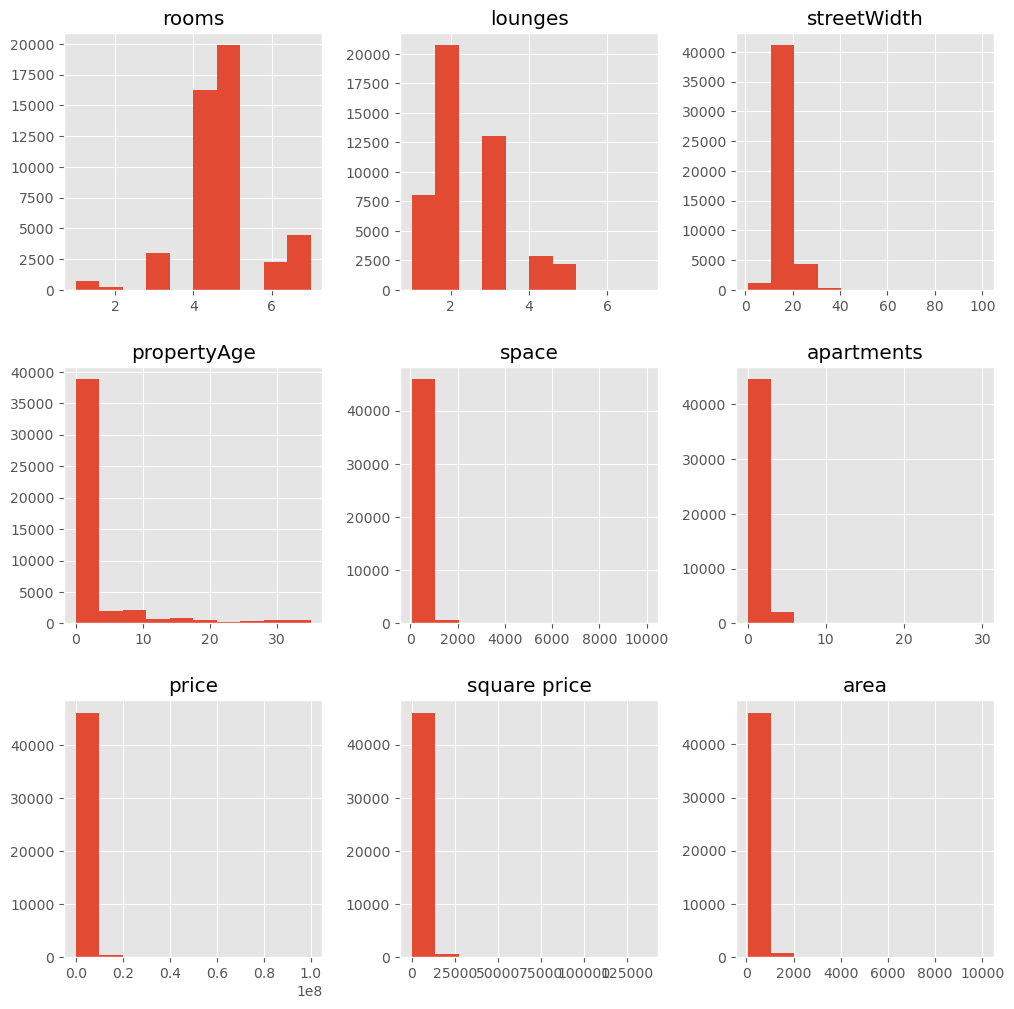

In [41]:
Data.hist(figsize = (12, 12))
plt.show()

Text(0.5, 1.0, 'ﻉﺭﺎﺸﻟﺍ ﺽﺮﻋ ﻰﻠﻋ ﻲﺤﻟ ﺮﻌﺴﻟﺍ ﻂﺳﻮﺘﻣ')

<Figure size 800x500 with 0 Axes>

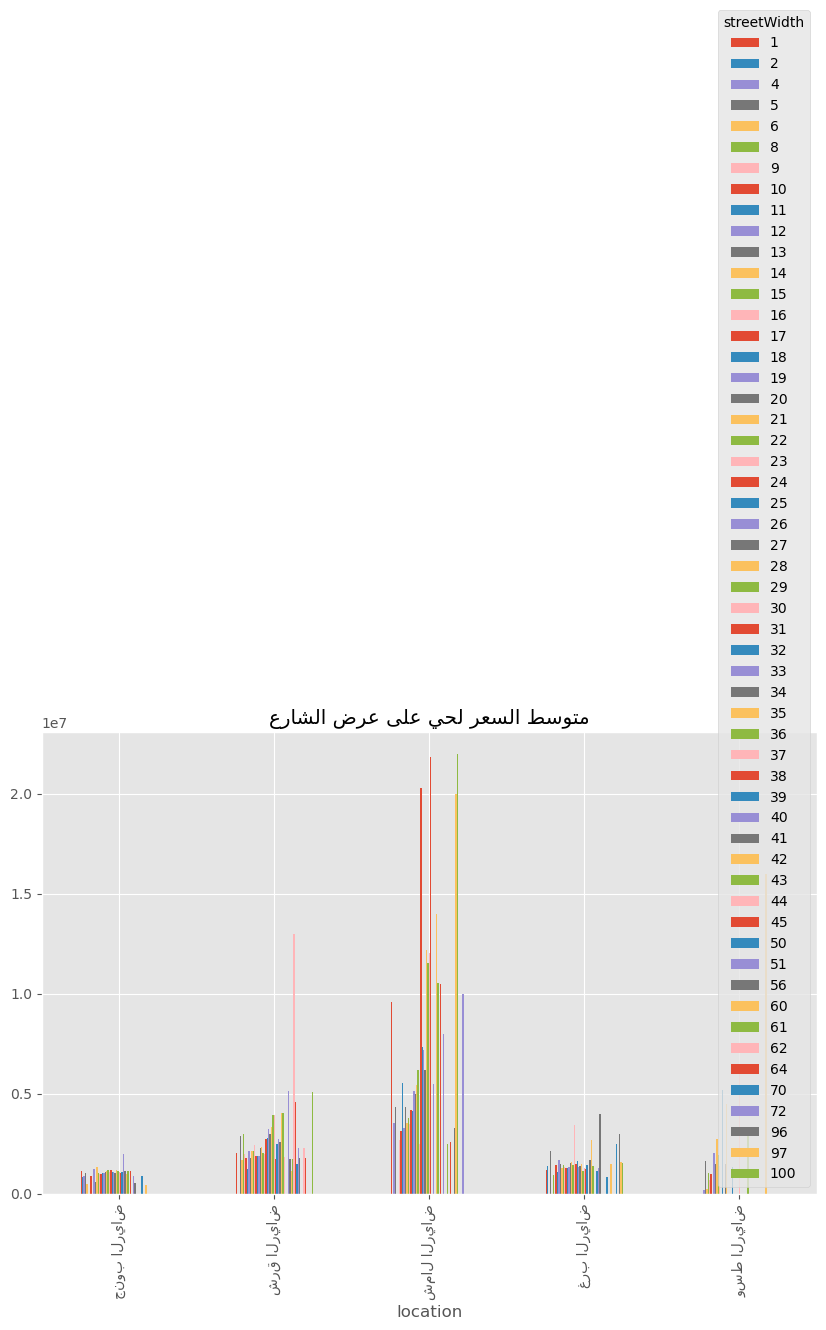

In [42]:
plt.figure(figsize=(8,5))
pd.crosstab(Data.location,Data.streetWidth ,values=Data.price, aggfunc=np.average).plot(kind="bar",figsize=(10,6))
plt.title(get_display(arabic_reshaper.reshape('متوسط السعر لحي على عرض الشارع')))

Text(0.5, 1.0, 'متوسط السعر لحي على مفروشه او لا')

<Figure size 800x500 with 0 Axes>

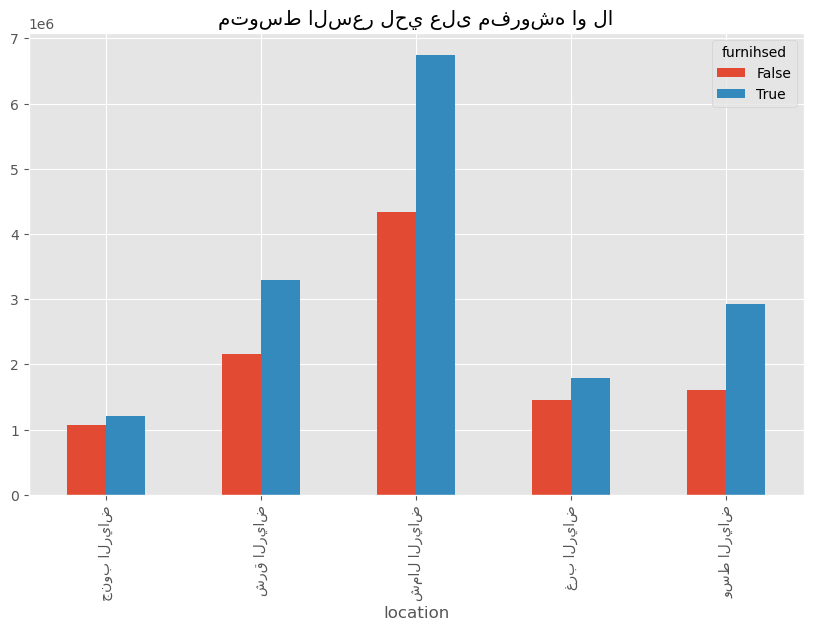

In [43]:
plt.figure(figsize=(8,5))
pd.crosstab(Data.location,Data.furnihsed ,values=Data.price, aggfunc=np.average).plot(kind="bar",figsize=(10,6))
plt.title('متوسط السعر لحي على مفروشه او لا') 

<AxesSubplot:>

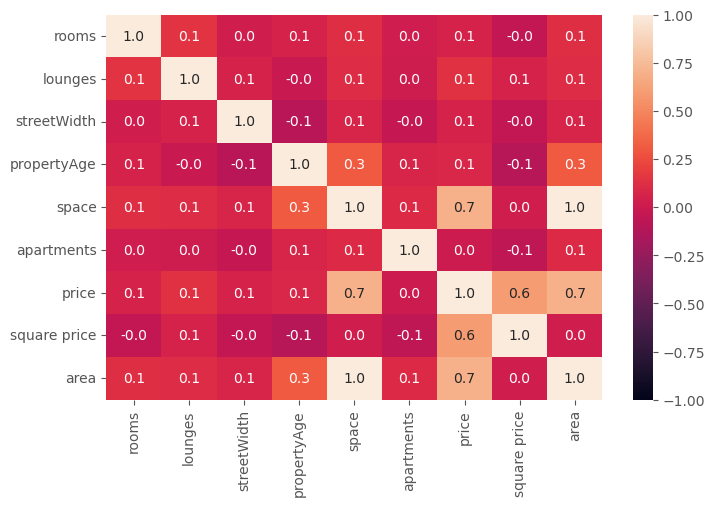

In [44]:
plt.figure(figsize=(8,5))
sns.heatmap(Data.corr(),annot=True,fmt='.1f',vmin=-1, vmax=1)

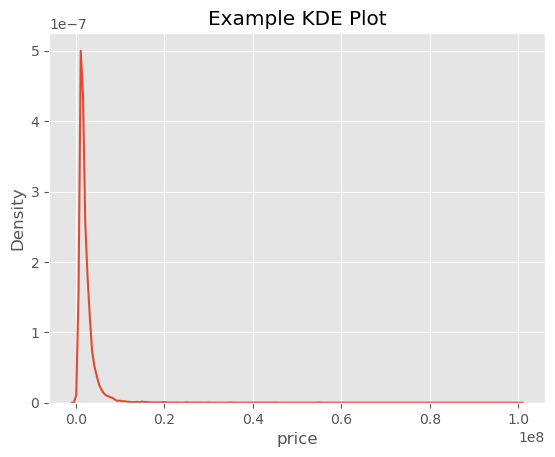

In [45]:
sns.kdeplot(
    data=Data, 
    x="price")

plt.title("Example KDE Plot");

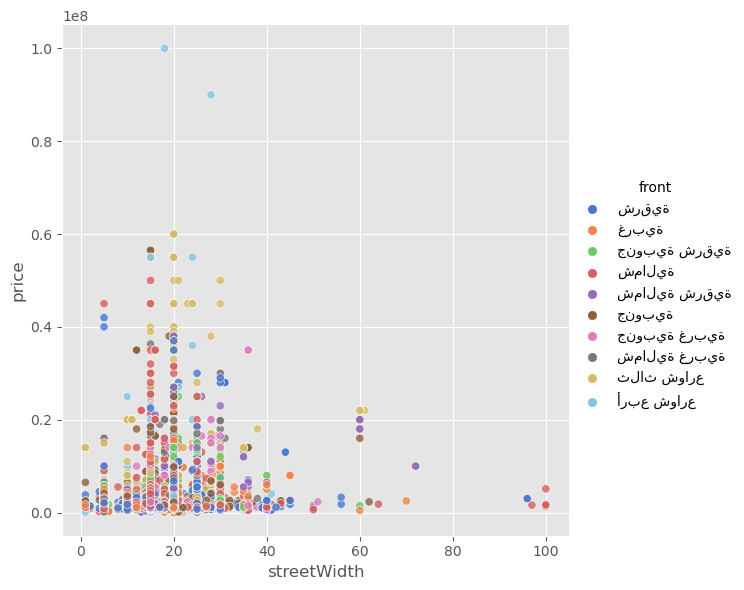

In [46]:
sns.relplot(
    x="streetWidth", 
    y="price", 
    hue="front",
    alpha=.8, 
    palette="muted",
    height=6, 
    data=Data
)

In [ ]:
#sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.swarmplot(
    x="rooms",
    y="price", 
    hue="rooms", 
    data=Data,
)
plt.title("--");